In [7]:
# make sure that model.py is in the same directory here when working on Google Colab. No need to run if we only run locally
from google.colab import files

uploaded = files.upload()


Saving models.py to models.py


In [2]:
#make sure pyDOE is install when working on Google Colab. No need to run if we only run locally
!pip install pyDOE

  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pyDOE


In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 20 10:35:11 2018

@original author: Dr. Paris Peridikaris
"""

import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from scipy.stats import norm

from models import BayesianLinearRegression


In [0]:

def basis_selector(X,N,M,basis = None):
    if basis == None:
        expanded_X = X
    else:
        this_X = np.ones((N,1))
        expanded_X = this_X
        
        for i in range(M):
            if basis == 'monomial':
                this_X = np.multiply(this_X,X)
            elif basis == 'legendre':
                this_legendre = np.polynomial.legendre.Legendre.basis(i + 1)
                this_X = np.polynomial.legendre.legval(X,this_legendre.coef)
            else:
                this_X = np.hstack((np.cos((i +1) * np.pi * X),np.sin((i +1) * np. pi * X)))
            expanded_X = np.hstack((expanded_X,this_X))
        
    return expanded_X

In [12]:
 # N is the number of training points.
  def compare_basis(N = 500,M = 8):
    noise_var = 0.5
    alpha = 5
    beta = 0.1

    # Create random input and output data
    X = lhs(1, N)
    y = np.exp(X) * np.sin(2 * np.pi * X) + noise_var * np.random.randn(N,1)
    basis_set = [None,'monomial','fourier','legendre']
    # Define model
    for j in range(4):
      
      expanded_X = basis_selector(X,N,M,basis_set[j])
      m = BayesianLinearRegression(expanded_X, y, alpha, beta)

      # ½AFit MLE and MAP estimates for w
      w_MLE = m.fit_MLE()
      w_MAP, Lambda_inv = m.fit_MAP()
      # Predict at a set of test points
      X_star = np.linspace(0,1,200).reshape(200,1)
      expanded_X_star = basis_selector(X_star,200,M,basis_set[j])
      y_pred_MLE = np.matmul(expanded_X_star, w_MLE)
      y_pred_MAP = np.matmul(expanded_X_star, w_MAP)

      # Draw sampes from the predictive posterior
      num_samples = 500
      mean_star, var_star = m.predictive_distribution(expanded_X_star)
      samples = np.random.multivariate_normal(mean_star.flatten(), var_star, num_samples)

      # Plot
      plt.figure(1, figsize=(8,6))
      plt.subplot(2,2,j + 1)
      title = basis_set[j]
      if title == None:
        title = 'identity set'
      plt.title(title)
      plt.plot(X_star, y_pred_MLE, linewidth=3.0, label = 'MLE')
      plt.plot(X_star, y_pred_MAP, linewidth=3.0, label = 'MAP')
      for i in range(0, num_samples):
          plt.plot(X_star, samples[i,:], 'k', linewidth=0.05)
      plt.plot(X,y,'.', label = 'Data')
      plt.legend()
      plt.xlabel('$x$')
      plt.ylabel('$y$')
      plt.tight_layout()

'''
  # Plot distribution of w
  plt.subplot(1,2,2)
  x_axis = np.linspace(0, 10, 1000).reshape(1000,1)
  expanded_x_axis = basis_selector(x_axis,1000,M,'monomial')
  for i in range(M):
    plt.plot(x_axis, norm.pdf(x_axis,w_MAP[i,:],Lambda_inv[i,i]), label = 'p(w|D)')
    plt.legend()
    plt.xlabel('$w$')
    plt.ylabel('$p(w|D)$')
    plt.axis('tight')
'''

"\n# Plot distribution of w\nplt.subplot(1,2,2)\nx_axis = np.linspace(0, 10, 1000).reshape(1000,1)\nexpanded_x_axis = basis_selector(x_axis,1000,M,'monomial')\nfor i in range(M):\n  plt.plot(x_axis, norm.pdf(x_axis,w_MAP[i,:],Lambda_inv[i,i]), label = 'p(w|D)')\n  plt.legend()\n  plt.xlabel('$w$')\n  plt.ylabel('$p(w|D)$')\n  plt.axis('tight')\n"

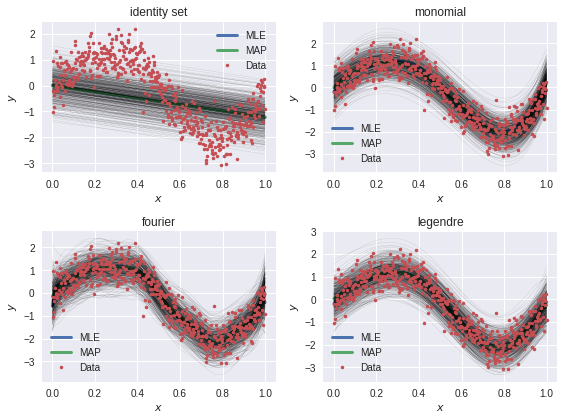

In [13]:
# N = 500, M = 8
compare_basis(N = 500, M = 8)

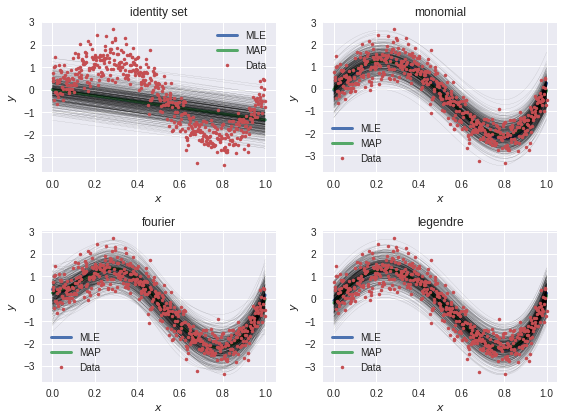

In [14]:
compare_basis(N = 500, M = 4)

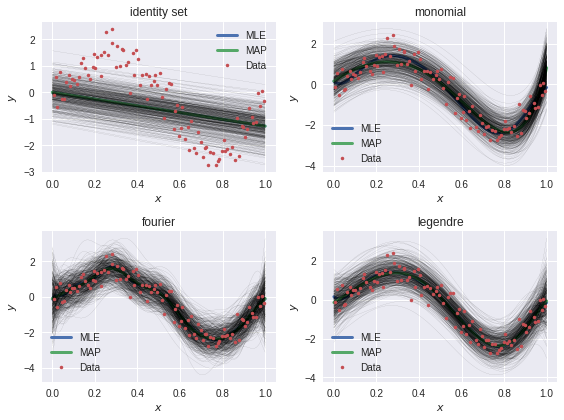

In [18]:
compare_basis(N = 100, M = 8)

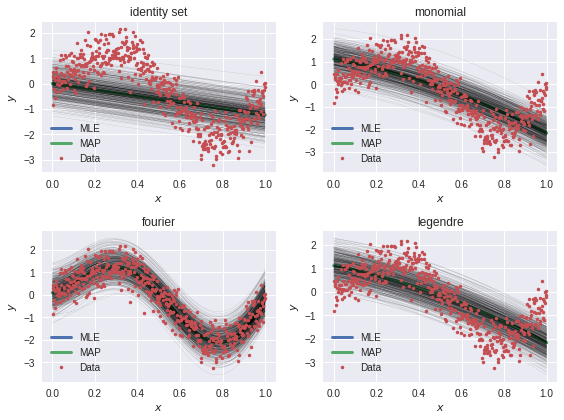

In [17]:
compare_basis(N = 500, M = 2)

First observation to note is identity set does not capture the data well at all. 

Also, if M<= 2 , the accuracy tend to detoriorate, which makes sense, because the overall data is characterized with periodic function with one cycle. As such, to fit it with polynomial basis, M >= 3 is required.

On the other hand, as we decrease N, we see fourier basis start to follow the noise and therefore are prone to overfitting especially if we keep high M.

Therefore, as long as M>= 3, either monomial or legendre basis would be a good choice.

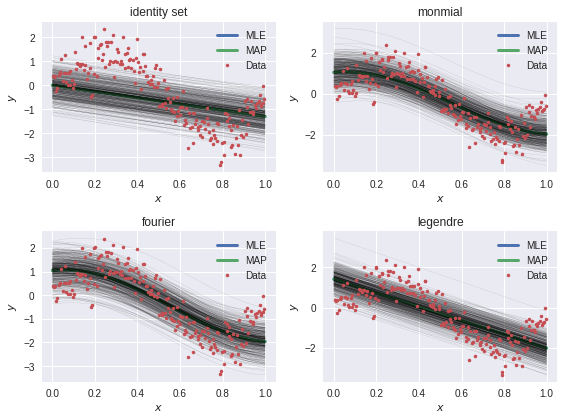

In [0]:
compare_basis(N = 200, M = 1)

In [6]:
X = lhs(1, 200)


sample_data/
